# The dataset

Given dataset has 48842 entries across 15 columns. The columns **'age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss'** and **'hours-per-week'** have numerical entries while the columns **'workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'gender', 'native-country'** and **'income'**  have categorical entries along with some missing values (represented by '?'). The column income has two unique entries '<=50k' and '>50k'.

# Objective

Our task is to predict the income based on the rest of the 14 columns using a machine learning model. But before that, we need to perform some exploratory data analysis on the dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import t,norm

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.shape

(48842, 15)

In [4]:
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [5]:
df.tail()

age     workclass  fnlwgt   education  educational-num  \
48837   27       Private  257302  Assoc-acdm               12   
48838   40       Private  154374     HS-grad                9   
48839   58       Private  151910     HS-grad                9   
48840   22       Private  201490     HS-grad                9   
48841   52  Self-emp-inc  287927     HS-grad                9   

           marital-status         occupation relationship   race  gender  \
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
48837             0             0              38  United-States  <=50K  
48838             0             0              40  United-States   >50K  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K

In [6]:
df.describe()

age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

In [7]:
num_cols = (df.describe()).columns
num_cols

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [8]:
df.describe(include = 'object')

workclass education      marital-status      occupation relationship  \
count      48842     48842               48842           48842        48842   
unique         9        16                   7              15            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       33906     15784               22379            6172        19716   

         race gender native-country income  
count   48842  48842          48842  48842  
unique      5      2             42      2  
top     White   Male  United-States  <=50K  
freq    41762  32650          43832  37155

In [9]:
cat_cols = (df.describe(include = 'object')).columns
cat_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [10]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# Univariate analysis

Let us plot boxplots,kde plots,histograms and countplots to understand our features better

## Boxplots

<AxesSubplot:ylabel='age'>

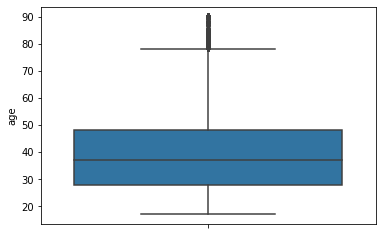

In [11]:
sns.boxplot(y = 'age', data = df)

We can see that there are a few outliers(people aged 80 or more)

<AxesSubplot:ylabel='fnlwgt'>

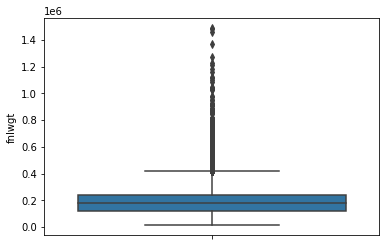

In [12]:
sns.boxplot(y = 'fnlwgt', data = df)

Values above 40,000 are treated as outliers for the final weight column

<AxesSubplot:ylabel='educational-num'>

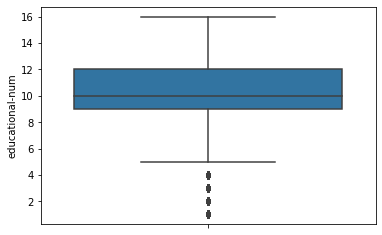

In [13]:
sns.boxplot(y = 'educational-num', data = df)

People with less than 5 years of education are treated as outliers

<AxesSubplot:ylabel='capital-gain'>

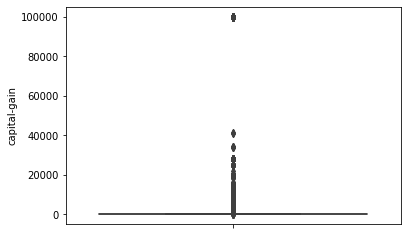

In [14]:
sns.boxplot(y = 'capital-gain', data = df)

<AxesSubplot:ylabel='capital-loss'>

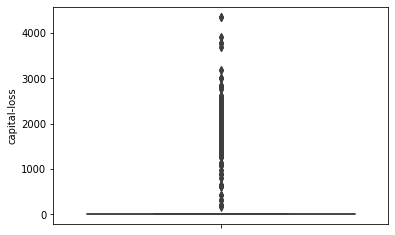

In [15]:
sns.boxplot(y = 'capital-loss', data = df)

Majority of our data points have 0 capital gain and 0 capital loss and hence all the other values are treated as outliers by the box plot

<AxesSubplot:ylabel='hours-per-week'>

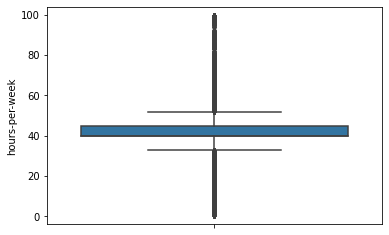

In [16]:
sns.boxplot(y = 'hours-per-week', data = df)

 People who work less than 30 hours and those who work more than 50 hours are treated as outliers

## KDE Plots

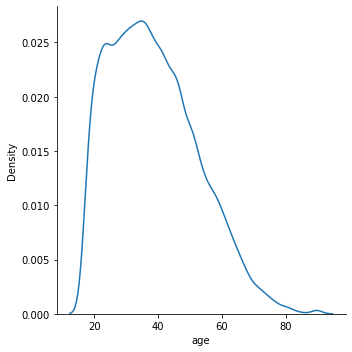

In [17]:
sns.displot( x = 'age', kind = 'kde' , data = df)

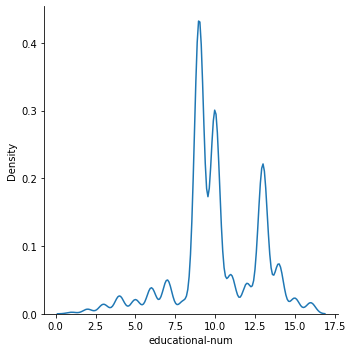

In [18]:
sns.displot( x = 'educational-num', kind = 'kde' , data = df)

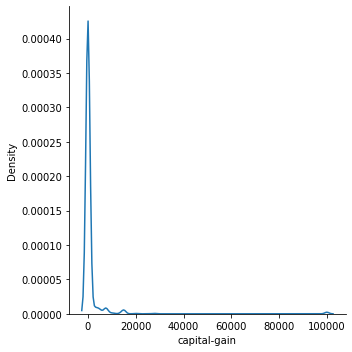

In [19]:
sns.displot( x = 'capital-gain', kind = 'kde' , data = df)

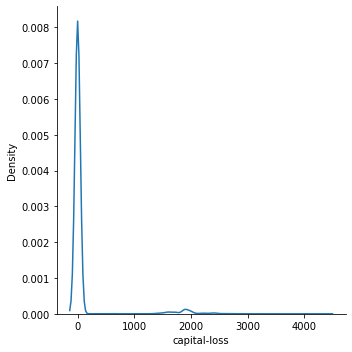

In [20]:
sns.displot( x = 'capital-loss', kind = 'kde' , data = df)

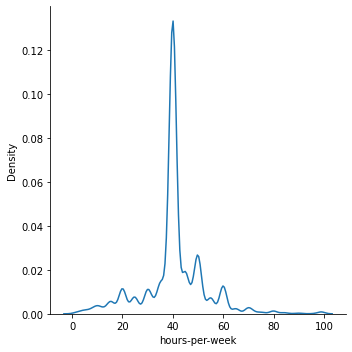

In [21]:
sns.displot( x = 'hours-per-week', kind = 'kde' , data = df)

### Observations from KDE plots

The age columns is concentrated around 20 and 60 years hence majority of our sample population are aged 20-60. Most of the people have around 7-11 years of education. Also most people work for around 38-45 hours per week and as we have already seen afte the boxplot the capital gain and capital loss are 0 for majority of the population. Of those non-zero values we have 15,000 as the most frequent capital gain and 20,000 as the most frequent capital loss. The KDE plot of final weight(no. of data points similar to the current data point) has no significance on its own.

## Histograms

<AxesSubplot:xlabel='age', ylabel='Count'>

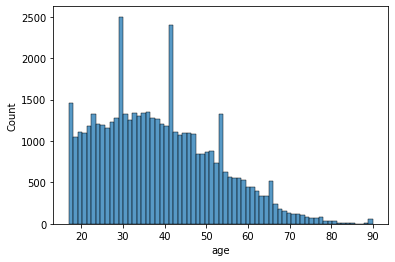

In [22]:
sns.histplot(x = 'age',data = df)

<AxesSubplot:xlabel='educational-num', ylabel='Count'>

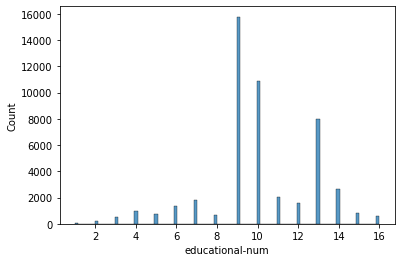

In [23]:
sns.histplot(x = 'educational-num',data = df)

<AxesSubplot:xlabel='capital-gain', ylabel='Count'>

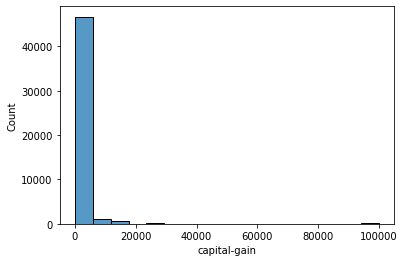

In [24]:
sns.histplot(x = 'capital-gain',data = df)

<AxesSubplot:xlabel='capital-loss', ylabel='Count'>

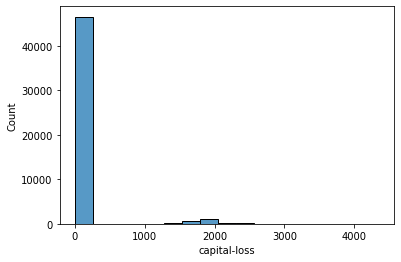

In [25]:
sns.histplot(x = 'capital-loss',data = df)

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

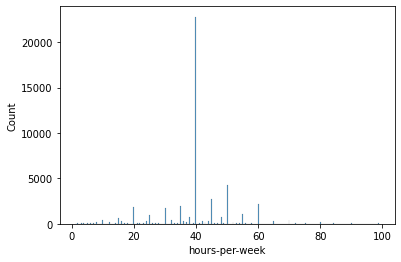

In [26]:
sns.histplot(x = 'hours-per-week',data = df)

### Observations from Histograms

People aged 29 have the highest frequency in our dataset while 9 years is the most frequent years of education a person received. Further, the highest number of people work 40 hours per week.

# Countplots

<AxesSubplot:xlabel='count', ylabel='workclass'>

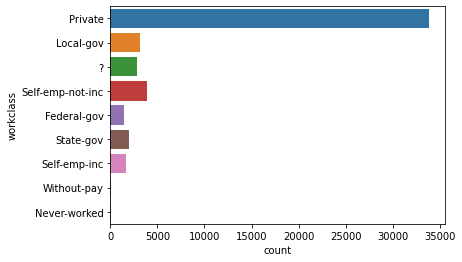

In [27]:
sns.countplot(y = 'workclass', data = df )

<AxesSubplot:xlabel='count', ylabel='education'>

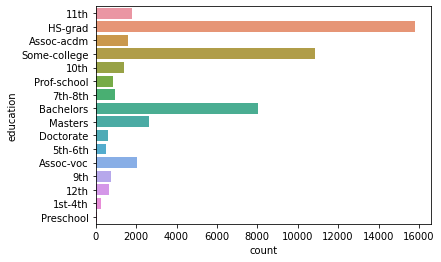

In [28]:
sns.countplot(y = 'education', data = df )

<AxesSubplot:xlabel='count', ylabel='marital-status'>

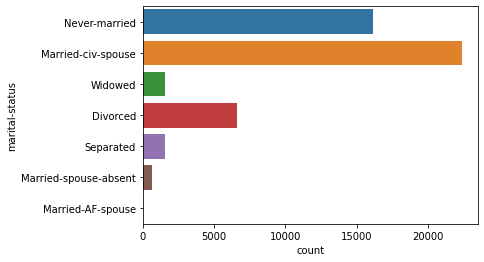

In [29]:
sns.countplot(y = 'marital-status', data = df )

<AxesSubplot:xlabel='count', ylabel='occupation'>

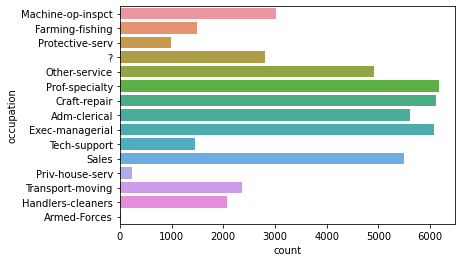

In [30]:
sns.countplot(y = 'occupation', data = df )

<AxesSubplot:xlabel='count', ylabel='relationship'>

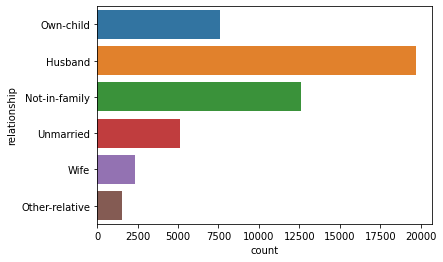

In [31]:
sns.countplot(y = 'relationship', data = df )

<AxesSubplot:xlabel='count', ylabel='race'>

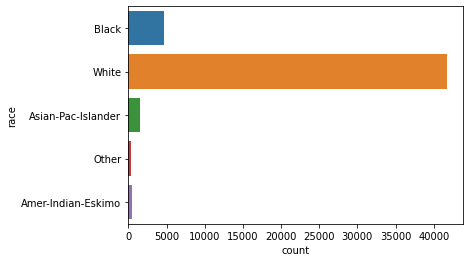

In [32]:
sns.countplot(y = 'race', data = df )

<AxesSubplot:xlabel='count', ylabel='gender'>

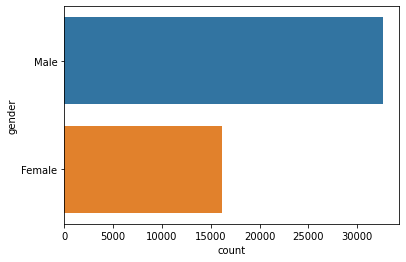

In [33]:
sns.countplot(y = 'gender', data = df )

<AxesSubplot:xlabel='count', ylabel='native-country'>

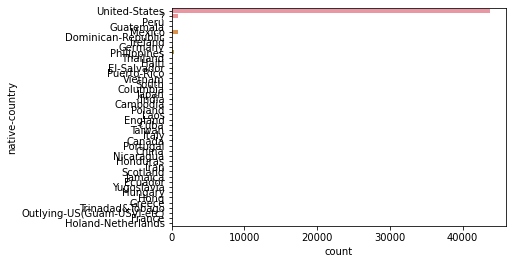

In [34]:
sns.countplot(y = 'native-country', data = df )

<AxesSubplot:xlabel='count', ylabel='income'>

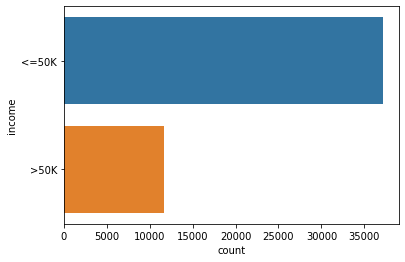

In [35]:
sns.countplot(y = 'income', data = df )

### Observations from countplots

We can clearly observe the maximum counts of each category. For the workclass column, majority of the people work in the private sector. Males are approximately twice the number of females. Majority of our people are white and are natives of the United States. About 16,000 people have an HS degree,the degree with the highest number of holders. Most of the people are married males. The occupation category has three occupations which are very popular namely prof-speciality, craft-repair and executive manager

# Bivariate analysis

## Scatter plots

Let us see how the different numerical features vary against each other

<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

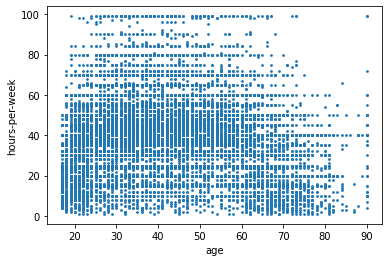

In [36]:
df.plot.scatter(x = 'age' , y = 'hours-per-week', s = 3)

## Observation

It is observed that people aged 80 or above seldom work more than 60 hours per week. People aged between 20 and 60 generally work between 30 and 50 hours per week. People aged between 60 and 80 work generally upto a maximum of 20 hours per week.There is no one aged less than 10 years and is working. 

Let us try to segregate this based on different genders, races and occupations.

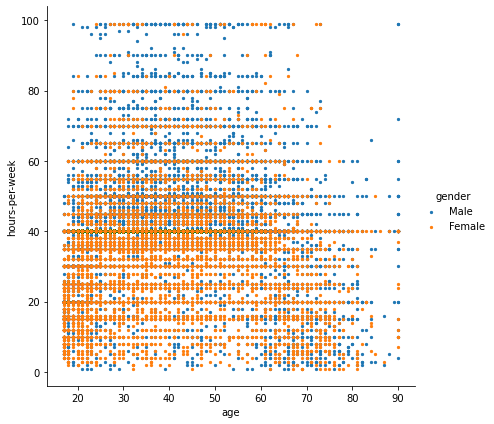

In [37]:
sns.FacetGrid(df,hue = 'gender', height = 6).map(plt.scatter,'age','hours-per-week',s = 5).add_legend()

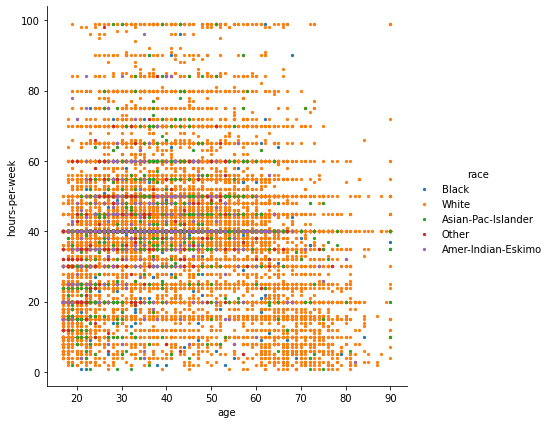

In [38]:
sns.FacetGrid(df,hue = 'race', height = 6).map(plt.scatter,'age','hours-per-week',s = 5).add_legend()

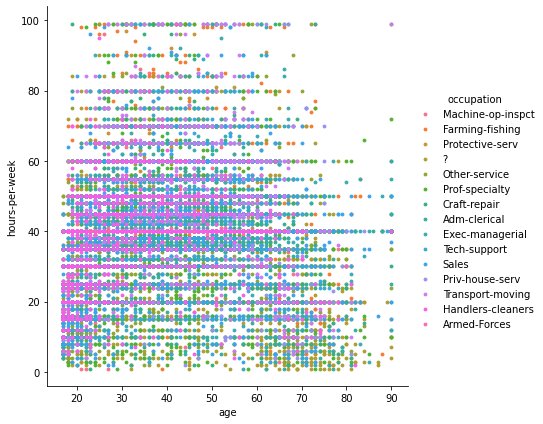

In [39]:
sns.FacetGrid(df,hue = 'occupation', height = 6).map(plt.scatter,'age','hours-per-week',s = 8).add_legend()

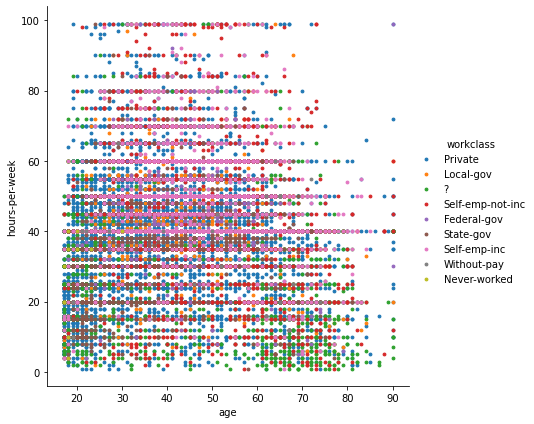

In [40]:
sns.FacetGrid(df,hue = 'workclass', height = 6).map(plt.scatter,'age','hours-per-week',s = 8).add_legend()

## Observations

We observe thar many of the underage workers are females,also females aged between 20 and 60 years generally work between 35-45 hours per week. Other plots vary for every sub-category

In [41]:
num_cols

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

<AxesSubplot:xlabel='educational-num', ylabel='hours-per-week'>

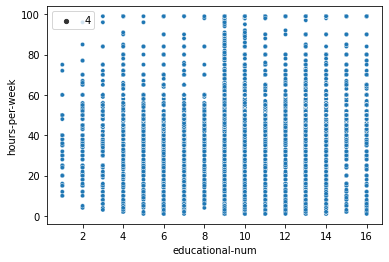

In [42]:
sns.scatterplot(x = 'educational-num', y = 'hours-per-week', data = df, size = 4)

## Observations 

We can see that people who have less than 8 years of education generally do not work above 60 hours per week. People with just 1 year of education generally do not work more than 40 hours per week. People with 9 and 10 years of education work varied hours per week starting from 0 to 100 hours per week. People with 11 or more years of education generally do not worl more than 80 hours per week.

<AxesSubplot:xlabel='educational-num', ylabel='capital-gain'>

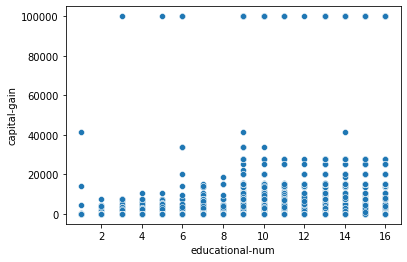

In [43]:
sns.scatterplot(x = 'educational-num', y = 'capital-gain', data = df)

<AxesSubplot:xlabel='educational-num', ylabel='capital-loss'>

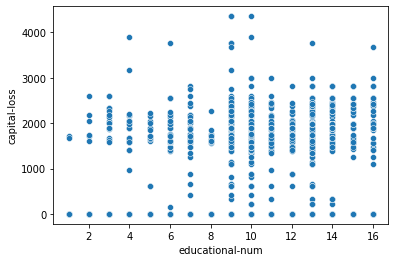

In [44]:
sns.scatterplot(x = 'educational-num', y = 'capital-loss', data = df)

## Observations

People with less than 8 years of education do not account for capital gain of more than 20,000. People with 9-16 years of education generally account for capital loss between 1200 and 2500.

# Pairplots

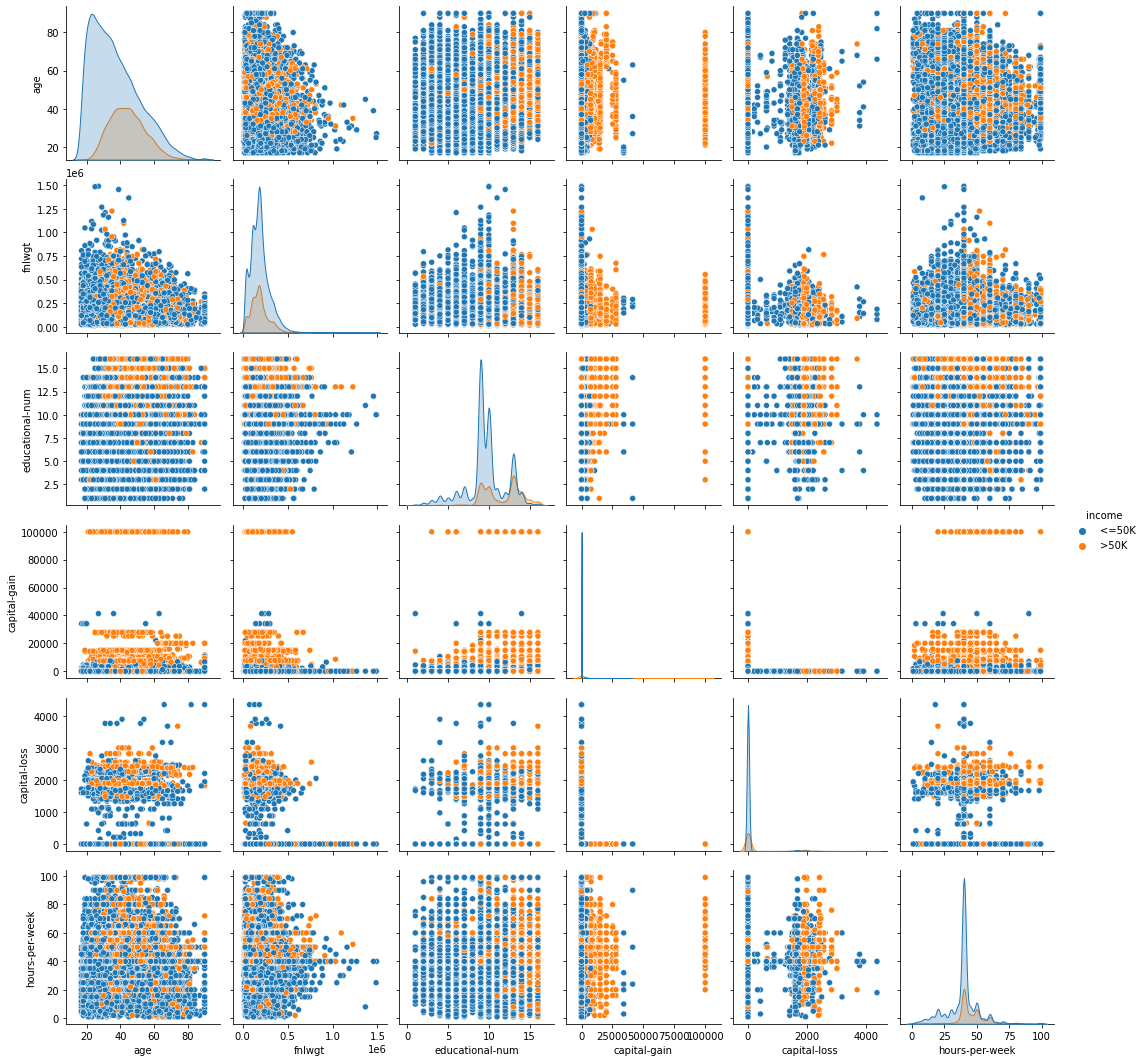

In [45]:
sns.pairplot(df, hue = 'income')

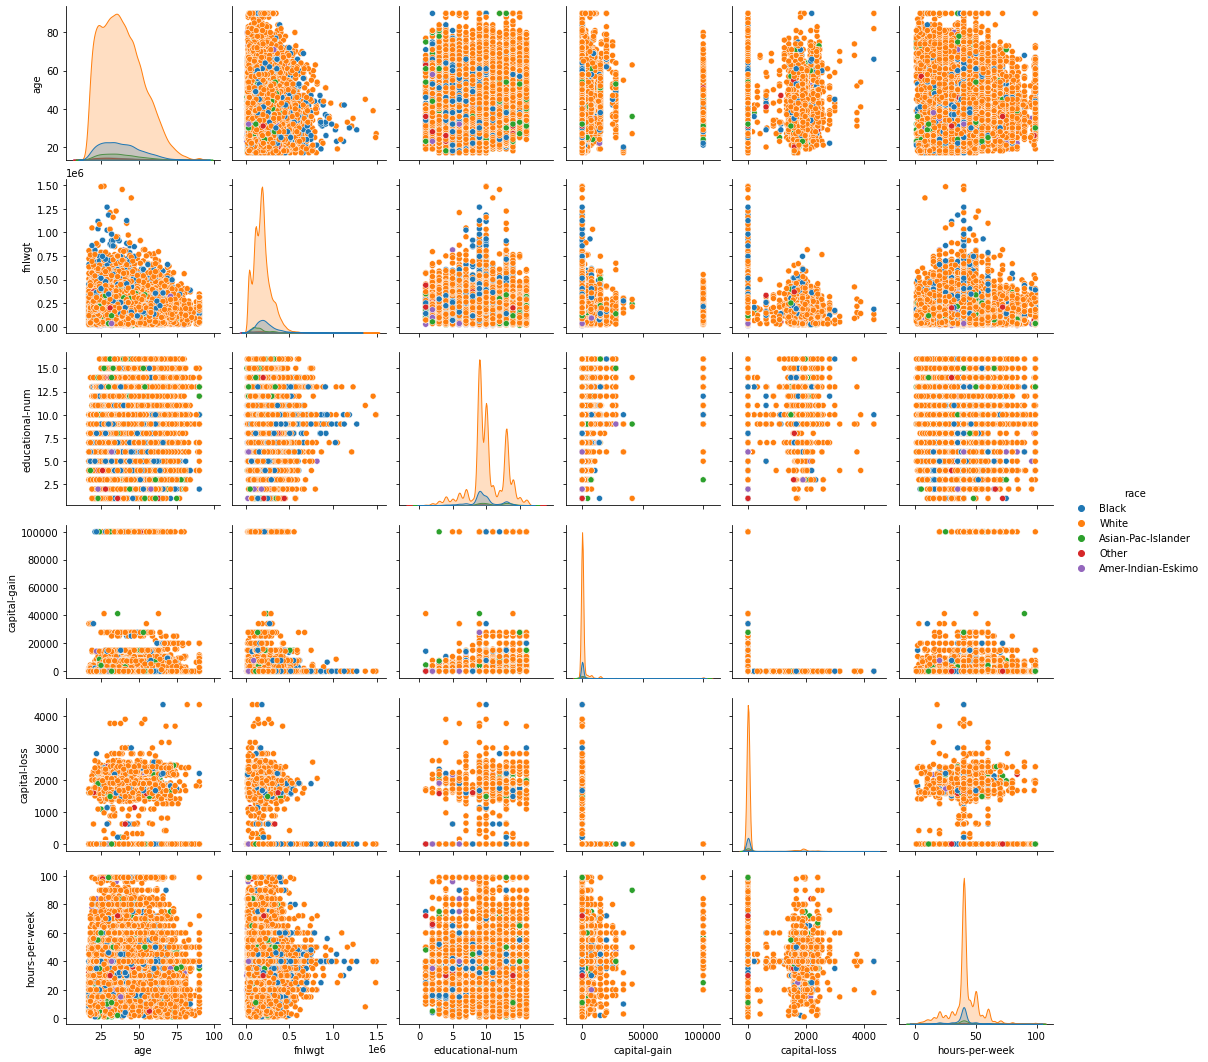

In [46]:
sns.pairplot(df, hue = 'race')

C:\Users\91810\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


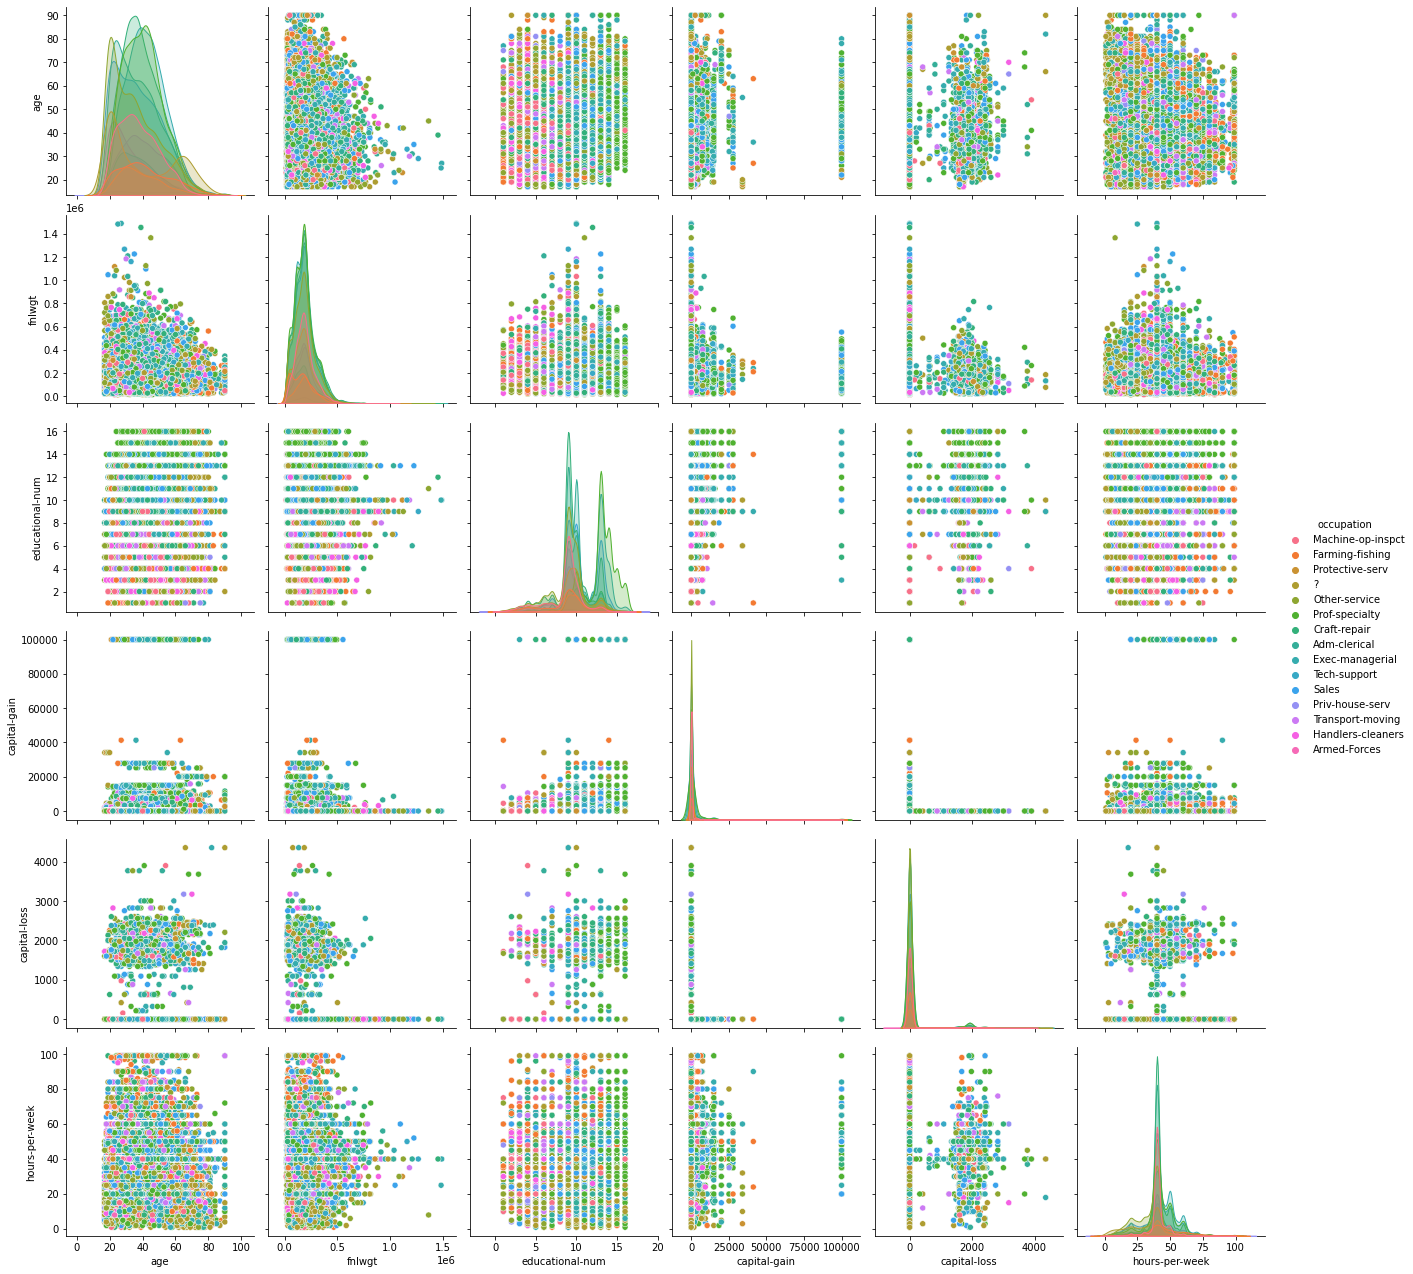

In [47]:
sns.pairplot(df, hue = 'occupation',size = 3)

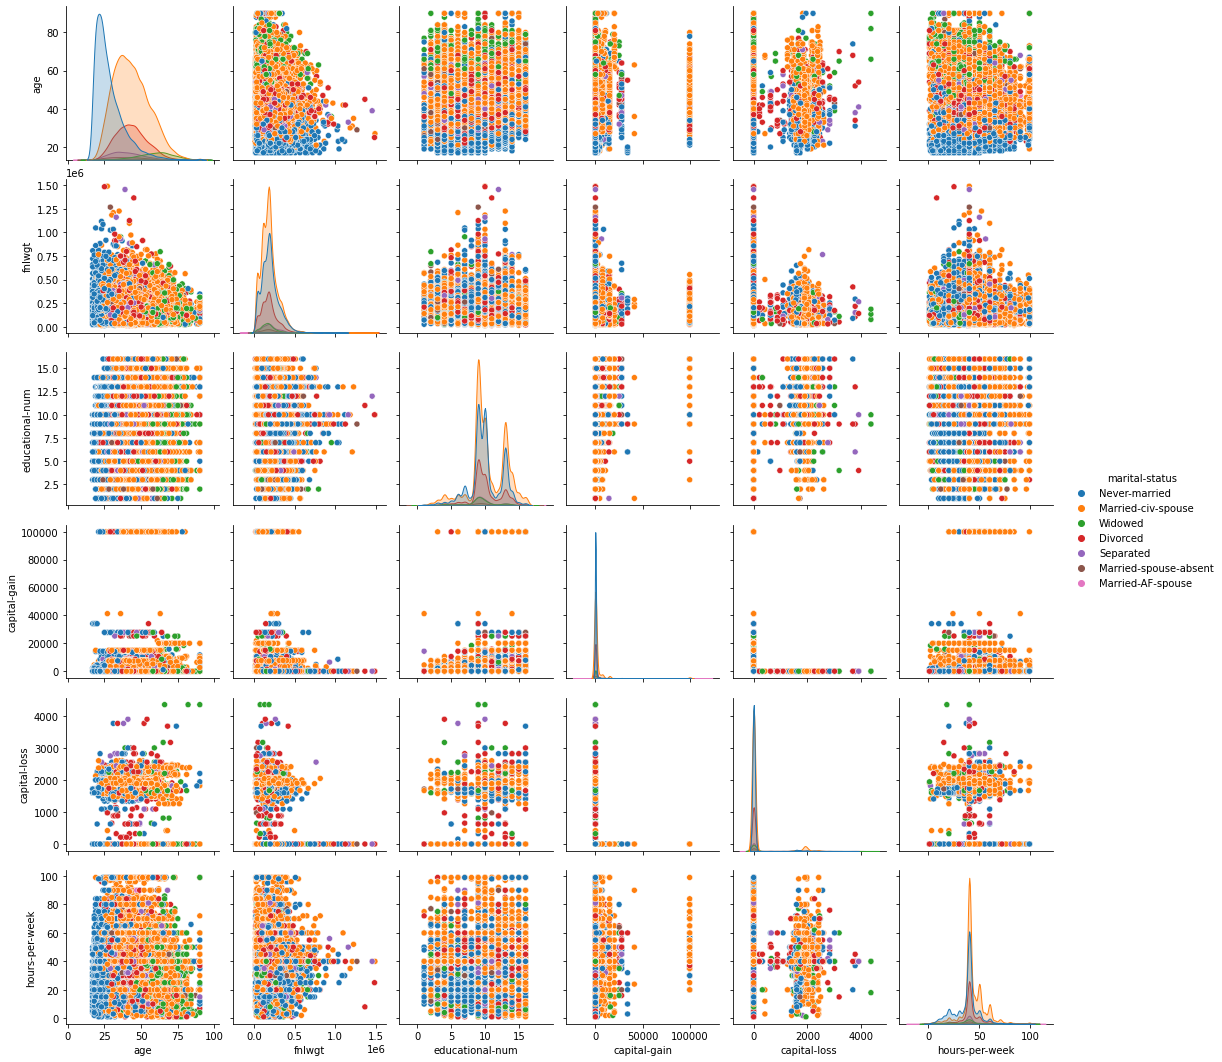

In [48]:
sns.pairplot(df, hue = 'marital-status')

## Stripplot

<AxesSubplot:xlabel='hours-per-week', ylabel='occupation'>

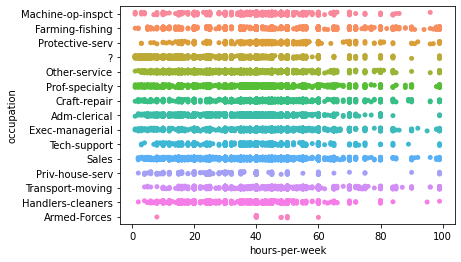

In [49]:
sns.stripplot(x = 'hours-per-week', y = "occupation", data = df)

<AxesSubplot:xlabel='hours-per-week', ylabel='workclass'>

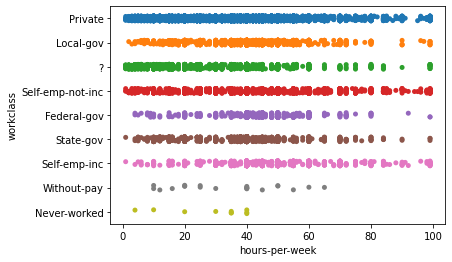

In [50]:
sns.stripplot(x = 'hours-per-week', y = "workclass", data = df)

<AxesSubplot:xlabel='age', ylabel='income'>

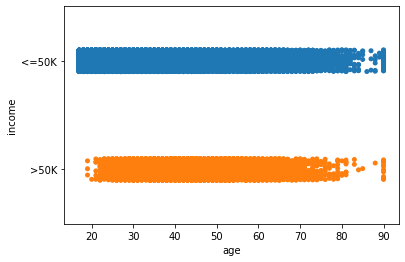

In [51]:
sns.stripplot(x = 'age', y ='income', data = df)

<AxesSubplot:xlabel='hours-per-week', ylabel='occupation'>

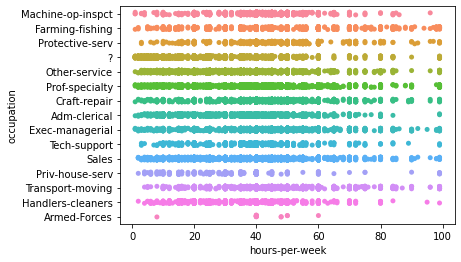

In [52]:
sns.stripplot(x = 'hours-per-week', y ='occupation', data = df)

<AxesSubplot:xlabel='hours-per-week', ylabel='gender'>

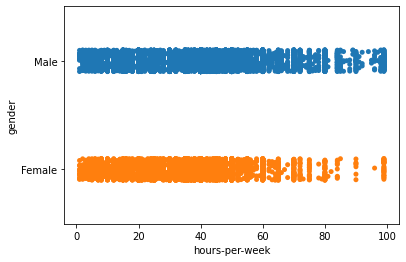

In [53]:
sns.stripplot(x = 'hours-per-week', y ='gender', data = df)

<AxesSubplot:xlabel='hours-per-week', ylabel='education'>

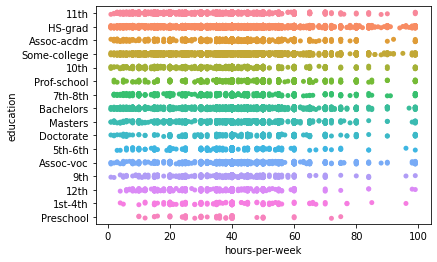

In [54]:
sns.stripplot(x = 'hours-per-week', y ='education', data = df)

<AxesSubplot:xlabel='capital-gain', ylabel='gender'>

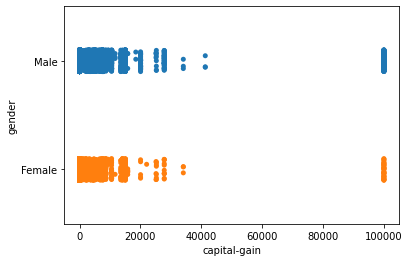

In [55]:
sns.stripplot(x = 'capital-gain', y ='gender', data = df)

<AxesSubplot:xlabel='capital-loss', ylabel='gender'>

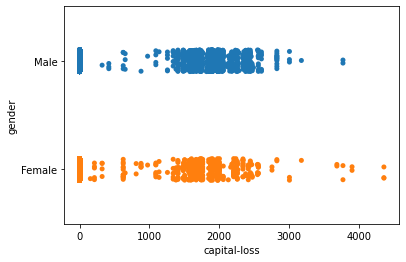

In [56]:
sns.stripplot(x = 'capital-loss', y ='gender', data = df)

<AxesSubplot:xlabel='age', ylabel='marital-status'>

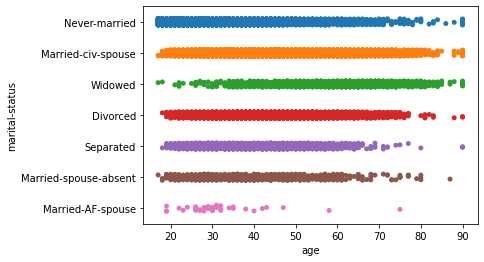

In [57]:
sns.stripplot(x = 'age', y ='marital-status', data = df)

## Observations from stripplot

These observations are consistent with those made from scatterplots and pairplots

## Barplots

<AxesSubplot:xlabel='age', ylabel='marital-status'>

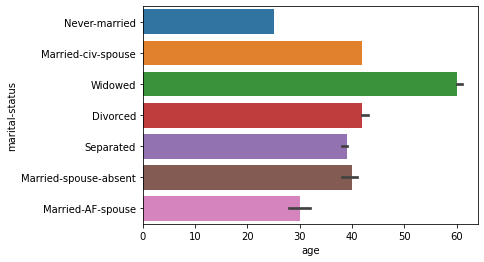

In [58]:
sns.barplot(y = 'marital-status',x = 'age' ,data = df , estimator = np.median)

<AxesSubplot:xlabel='age', ylabel='marital-status'>

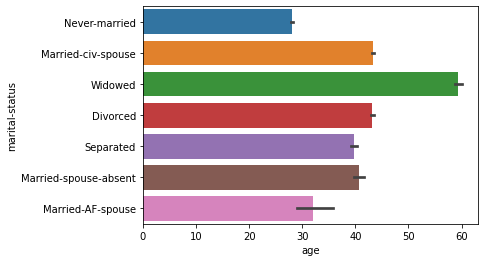

In [59]:
sns.barplot(y = 'marital-status',x = 'age' ,data = df , estimator = np.mean)

<AxesSubplot:xlabel='count', ylabel='marital-status'>

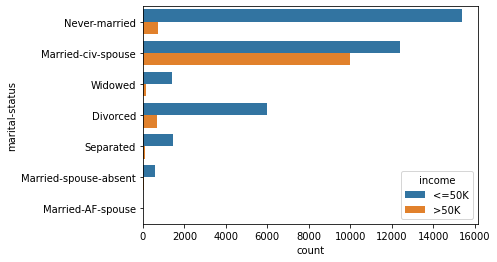

In [60]:
sns.countplot(y = 'marital-status' ,data = df, hue = 'income')

<AxesSubplot:xlabel='count', ylabel='relationship'>

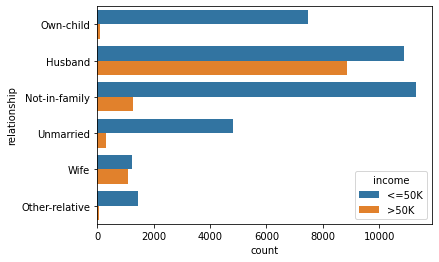

In [61]:
sns.countplot(y = 'relationship' ,data = df, hue = 'income')

<AxesSubplot:xlabel='count', ylabel='workclass'>

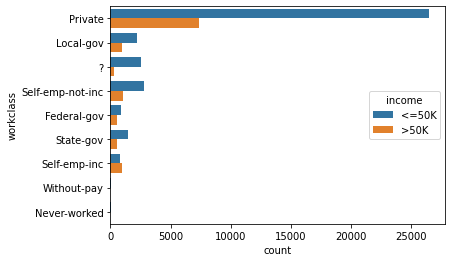

In [62]:
sns.countplot(y = 'workclass' ,data = df, hue = 'income')

## Observations from the Barplot and Countplot

 1. We can see that on average a person who never married is around  25-30 years old. Further people married people who are civilian, seperated, absent spouse and divorced persons are aged between 40-45 on average. Married people whose spouse are in the army are generally aged around 30-35 years and widows are generally aged above 55. 
 2. Also, people who never married and people who are divorced are more likely to have income below 50k. The relationship countplot consolidates our point as unmarried people and people not in families have an overwhelmingly high chance of earning below 50k than not.
 3. Only the self employment sector has a higher probability of earning more than 50k tha not.

# Handling Missing Data

The missing data is represented by '?'. Let us see where these data are present

In [63]:
df.isin(['?']).any()

age                False
workclass           True
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation          True
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country      True
income             False
dtype: bool

In [64]:
df_withnan = (df[["workclass","occupation","native-country"]]).copy()

In [80]:
mode = df_withnan.mode()

In [81]:
mode

workclass      occupation native-country
0   Private  Prof-specialty  United-States

In [84]:
df['workclass'].replace({'?':mode.iloc[0]['workclass']} ,inplace = True)
df['occupation'].replace({'?':mode.iloc[0]['occupation']} ,inplace = True)
df['native-country'].replace({'?':mode.iloc[0]['native-country']} ,inplace = True)

In [85]:
df.isin(['?']).any()

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

Here we treated all the missing values by replacing them with the mode of that column

# Treating Outliers

Anything above Q3(75th percentile)+  1.5 * IQR(Inter Quartile Range) and below  Q1(25th percentile) - 1.5 * IQR are treated as outliers. We impute them with the 95th and 5th percentile respectively

In [89]:
for i in ['age','educational-num']:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    upper = df[i] >= (Q3+1.5*IQR)
    lower = df[i] <= (Q1-1.5*IQR)
    for j in list(np.where(upper)[0]):
        df[i].replace({df[i][j]},df[i].quantile(0.95), inplace = True)
    for k in list(np.where(lower)[0]):
        df[i].replace({df[i][k]},df[i].quantile(0.05), inplace = True)

In [90]:
import scipy.stats as sc

((array([-4.18606635, -3.98006955, -3.86775228, ...,  3.86775228,
          3.98006955,  4.18606635]),
  array([ 1,  1,  1, ..., 99, 99, 99], dtype=int64)),
 (11.6520722826851, 40.42238237582408, 0.9402621255570304))

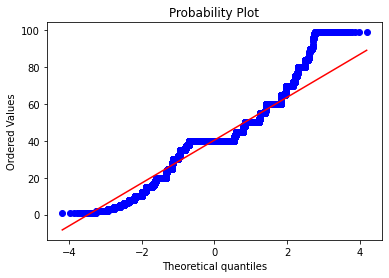

In [91]:
sc.probplot(df['hours-per-week'], dist="norm", plot=plt)

((array([-4.18606635, -3.98006955, -3.86775228, ...,  3.86775228,
          3.98006955,  4.18606635]),
  array([ 0.        ,  0.        ,  0.        , ..., 97.12696856,
         97.12696856, 97.12696856])),
 (11.548673639194284, 39.14775498032514, 0.940282284432403))

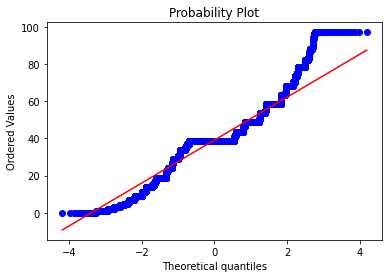

In [104]:
graph , lmda = sc.boxcox(df['hours-per-week'])
sc.probplot(graph, dist="norm", plot=plt)

In [105]:
print(lmda)

0.9975423543967301


Since the value of lambda after performing boxcox transformation on the hours-per-week column is 1, we do not need to transform this column and it can be assumed normally distributed.

In [115]:
df['capital-gain'].value_counts()

0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
1111         1
6612         1
2387         1
22040        1
1731         1
Name: capital-gain, Length: 123, dtype: int64

In [116]:
df['capital-loss'].value_counts()

0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
155         1
1870        1
2465        1
1911        1
2080        1
Name: capital-loss, Length: 99, dtype: int64

Both the capital loss and the capital gain columns can be dropped as majority of the values are 0 and we don't want overfitting

In [118]:
df.drop(['capital-gain','capital-loss'],axis = 1)

age     workclass  fnlwgt     education  educational-num  \
0      25.0       Private  226802          11th              7.0   
1      38.0       Private   89814       HS-grad              9.0   
2      28.0     Local-gov  336951    Assoc-acdm             12.0   
3      44.0       Private  160323  Some-college             10.0   
4      18.0       Private  103497  Some-college             10.0   
...     ...           ...     ...           ...              ...   
48837  27.0       Private  257302    Assoc-acdm             12.0   
48838  40.0       Private  154374       HS-grad              9.0   
48839  58.0       Private  151910       HS-grad              9.0   
48840  22.0       Private  201490       HS-grad              9.0   
48841  52.0  Self-emp-inc  287927       HS-grad              9.0   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing      Husband  White    Male   
2      Married-civ-spouse    Protective-serv      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married     Prof-specialty    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       hours-per-week native-country income  
0                  40  United-States  <=50K  
1                  50  United-States  <=50K  
2                  40  United-States   >50K  
3                  40  United-States   >50K  
4                  30  United-States  <=50K  
...               ...            ...    ...  
48837              38  United-States  <=50K  
48838              40  United-States   >50K  
48839              40  United-States  <=50K  
48840              20  United-States  <=50K  
48841              40  United-States   >50K  

[48842 rows x 13 columns]

In [123]:
df['native-country'].value_counts()

United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador                     

Let us drop the native country column as well to avoid overfitting and many people are from the US.

In [128]:
df.drop(['native-country'], axis = 1)

age     workclass  fnlwgt     education  educational-num  \
0      25.0       Private  226802          11th              7.0   
1      38.0       Private   89814       HS-grad              9.0   
2      28.0     Local-gov  336951    Assoc-acdm             12.0   
3      44.0       Private  160323  Some-college             10.0   
4      18.0       Private  103497  Some-college             10.0   
...     ...           ...     ...           ...              ...   
48837  27.0       Private  257302    Assoc-acdm             12.0   
48838  40.0       Private  154374       HS-grad              9.0   
48839  58.0       Private  151910       HS-grad              9.0   
48840  22.0       Private  201490       HS-grad              9.0   
48841  52.0  Self-emp-inc  287927       HS-grad              9.0   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing      Husband  White    Male   
2      Married-civ-spouse    Protective-serv      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married     Prof-specialty    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week  income  
0                 0             0              40       0  
1                 0             0              50       0  
2                 0             0              40       1  
3              7688             0              40       1  
4                 0             0              30       0  
...             ...           ...             ...     ...  
48837             0             0              38       0  
48838             0             0              40       1  
48839             0             0              40       0  
48840             0             0              20       0  
48841         15024             0              40       1  

[48842 rows x 14 columns]

# Conclusions of EDA

We have successfully performed univariate, bivariate and multivariate analysis of our dataset. We successfully imputed outliers in age and educational number columns and deleted the capital gain,the capital loss and native country columns. Now let us proceed to feauture transformation

# Feature Transformation

1. Let us convert the income into binary format first
2. Encode other categorical columns
3. Split into train and test set
4. Standard scale numerical columns

In [119]:
df['income']

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48842, dtype: object

In [120]:
df['income'].replace({'<=50K':0, '>50K':1} , inplace = True)

In [121]:
df['income']

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

Let us encode the categorical variables using get_dummies function

In [129]:
df = pd.get_dummies(df,drop_first =  True)

In [133]:
df.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farmi

In [135]:
X = df.iloc[:,np.r_[0:6,7:]].values
y = df.iloc[:,6].values

In [136]:
print(X)

[[2.50000e+01 2.26802e+05 7.00000e+00 ... 0.00000e+00 4.00000e+01
  0.00000e+00]
 [3.80000e+01 8.98140e+04 9.00000e+00 ... 0.00000e+00 5.00000e+01
  0.00000e+00]
 [2.80000e+01 3.36951e+05 1.20000e+01 ... 0.00000e+00 4.00000e+01
  1.00000e+00]
 ...
 [5.80000e+01 1.51910e+05 9.00000e+00 ... 0.00000e+00 4.00000e+01
  0.00000e+00]
 [2.20000e+01 2.01490e+05 9.00000e+00 ... 0.00000e+00 2.00000e+01
  0.00000e+00]
 [5.20000e+01 2.87927e+05 9.00000e+00 ... 0.00000e+00 4.00000e+01
  1.00000e+00]]


In [137]:
print(y)

[0 0 1 ... 0 0 1]


In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [139]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [141]:
y_pred = classifier.predict(X_test)

In [143]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

1.0

## KNN

In [144]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [145]:
y_pred = classifier2.predict(X_test)

In [146]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[7329    0]
 [   4 2436]]


0.9995905415088545

### Changing number of nearest neighbours

In [147]:
from sklearn.neighbors import KNeighborsClassifier
classifier2_1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier2_1.fit(X_train, y_train)

KNeighborsClassifier()

In [148]:
y_pred = classifier2_1.predict(X_test)

In [149]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[7329    0]
 [   2 2438]]


0.9997952707544273

# Support Vector Machine

In [150]:
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'linear')
classifier3.fit(X_train, y_train)

SVC(kernel='linear')

In [151]:
y_pred = classifier3.predict(X_test)

In [152]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[7329    0]
 [   0 2440]]


1.0

# Kernel SVM

In [153]:
classifier4 = SVC(kernel = 'rbf')
classifier4.fit(X_train, y_train)

SVC()

In [155]:
y_pred = classifier4.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[7329    0]
 [   0 2440]]


1.0

# Naive Bayes

In [156]:
from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
classifier5.fit(X_train, y_train)

GaussianNB()

In [157]:
y_pred = classifier5.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[7329    0]
 [   0 2440]]


1.0

# Decision Tree

In [158]:
from sklearn.tree import DecisionTreeClassifier
classifier6 = DecisionTreeClassifier(criterion = 'entropy')
classifier6.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [159]:
y_pred = classifier5.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[7329    0]
 [   0 2440]]


1.0

# Conclusion
 
Almost all our machine learning models classify income with 100% accuracy on the test set. This may be due to our very small dataset or good relationship between our features and good exploratory data analysis